## Introduction to Pandas

In [42]:
import pandas as pd

In [43]:
# 2 main datatypes: Series & DataFrame
# Series = 1-D
# DF.    = 2-D

series = pd.Series(["BMW", "Toyota", "Honda"])
colours = pd.Series(["Red", "Blue", "White"])

In [44]:
car_data = pd.DataFrame({"Car make": series, "Colour" : colours})
car_data

,Car make,Colour
0,BMW,Red
1,Toyota,Blue
2,Honda,White


In [45]:
# Import data
car_sales = pd.read_csv("./data/car-sales.csv")

In [46]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


## Describe Data

In [47]:
# Attributes
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [48]:
car_sales.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [49]:
car_colums = car_sales.columns
car_colums

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [50]:
car_sales.index

RangeIndex(start=0, stop=10, step=1)

In [51]:
# Function
car_sales.describe()

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


In [52]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 528.0+ bytes


In [53]:
car_sales.mean()

Odometer (KM)    78601.4
Doors                4.0
dtype: float64

In [54]:
car_prices = pd.Series([3000,1500,112045])
car_prices.mean()

38848.333333333336

In [55]:
car_sales["Doors"].sum()

40

In [56]:
len(car_sales)

10

## Viewing and selecting data

In [57]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [58]:
car_sales.tail()

,Make,Colour,Odometer (KM),Doors,Price
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [59]:
# .loc and .iloc
animals = pd.Series(["cat", "dog", "Bird", "panda", "snake"], index=[0,3,9,8,3])

In [60]:
animals

0      cat
3      dog
9     Bird
8    panda
3    snake
dtype: object

In [61]:
# loc refers to index
animals.loc[3]

3      dog
3    snake
dtype: object

In [62]:
# .iloc refers to position
animals.iloc[3]

'panda'

### Boolean Indexing

In [63]:
car_sales[car_sales["Odometer (KM)"] > 100000]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [64]:
pd.crosstab(car_sales["Make"], car_sales["Doors"])

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


In [65]:
# Groupy
car_sales.groupby(["Make"]).mean()

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


<AxesSubplot:>

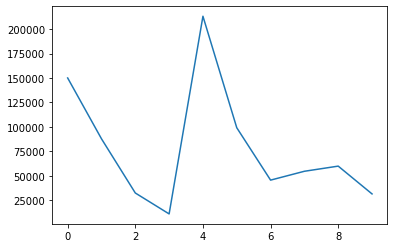

In [66]:
car_sales["Odometer (KM)"].plot()

<AxesSubplot:>

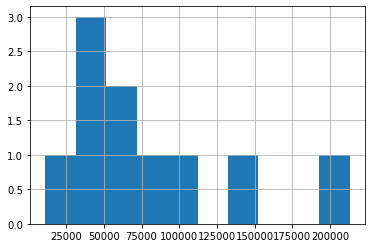

In [67]:
car_sales["Odometer (KM)"].hist() #150000 & 200000 consider as Outliner

In [68]:
car_sales['Price'] = car_sales['Price'].replace('[\$\,\.]',"",regex=True).astype(int)

<AxesSubplot:>

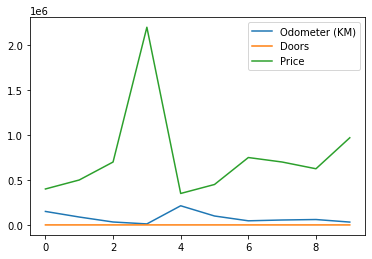

In [69]:
car_sales.plot()

In [70]:
car_sales["Make"] = car_sales["Make"].str.lower()

In [71]:
car_sales_missing = pd.read_csv("./data/car-sales-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [72]:
car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean(), inplace = True)
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,NaN,92302.666667,4.0,"$7,500"
7,Honda,Blue,92302.666667,4.0,NaN
8,Toyota,White,60000.000000,NaN,NaN
9,NaN,White,31600.000000,4.0,"$9,700"


In [73]:
car_sales_missing.dropna(inplace=True)
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"


## Create new Columns for Pandas DF

In [74]:
#columns from series

seat_columns = pd.Series([5,5,5,5,5])

# New column added
car_sales["Seats"] = seat_columns
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,toyota,White,150043,4,400000,5.0
1,honda,Red,87899,4,500000,5.0
2,toyota,Blue,32549,3,700000,5.0
3,bmw,Black,11179,5,2200000,5.0
4,nissan,White,213095,4,350000,5.0
5,toyota,Green,99213,4,450000,NaN
6,honda,Blue,45698,4,750000,NaN
7,honda,Blue,54738,4,700000,NaN
8,toyota,White,60000,4,625000,NaN
9,nissan,White,31600,4,970000,NaN


In [75]:
car_sales["Seats"].fillna(5, inplace = True)

In [76]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,toyota,White,150043,4,400000,5.0
1,honda,Red,87899,4,500000,5.0
2,toyota,Blue,32549,3,700000,5.0
3,bmw,Black,11179,5,2200000,5.0
4,nissan,White,213095,4,350000,5.0
5,toyota,Green,99213,4,450000,5.0
6,honda,Blue,45698,4,750000,5.0
7,honda,Blue,54738,4,700000,5.0
8,toyota,White,60000,4,625000,5.0
9,nissan,White,31600,4,970000,5.0


In [77]:
fuel_economy = [7.5, 9.2, 5.0, 9.6, 8.7, 4.7, 7.6,8.7,3.0,4.5]
car_sales["Fuel per 100KM"] = fuel_economy
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM
0,toyota,White,150043,4,400000,5.0,7.5
1,honda,Red,87899,4,500000,5.0,9.2
2,toyota,Blue,32549,3,700000,5.0,5.0
3,bmw,Black,11179,5,2200000,5.0,9.6
4,nissan,White,213095,4,350000,5.0,8.7
5,toyota,Green,99213,4,450000,5.0,4.7
6,honda,Blue,45698,4,750000,5.0,7.6
7,honda,Blue,54738,4,700000,5.0,8.7
8,toyota,White,60000,4,625000,5.0,3.0
9,nissan,White,31600,4,970000,5.0,4.5


In [78]:
car_sales["Total fuel used (L)"] = car_sales["Odometer (KM)"]/100*car_sales["Fuel per 100KM"]

In [79]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L)
0,toyota,White,150043,4,400000,5.0,7.5,11253.225
1,honda,Red,87899,4,500000,5.0,9.2,8086.708
2,toyota,Blue,32549,3,700000,5.0,5.0,1627.450
3,bmw,Black,11179,5,2200000,5.0,9.6,1073.184
4,nissan,White,213095,4,350000,5.0,8.7,18539.265
5,toyota,Green,99213,4,450000,5.0,4.7,4663.011
6,honda,Blue,45698,4,750000,5.0,7.6,3473.048
7,honda,Blue,54738,4,700000,5.0,8.7,4762.206
8,toyota,White,60000,4,625000,5.0,3.0,1800.000
9,nissan,White,31600,4,970000,5.0,4.5,1422.000


In [80]:
car_sales["Number of wheels"] = 4
car_sales["Passed road safety"] = True
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L),Number of wheels,Passed road safety
0,toyota,White,150043,4,400000,5.0,7.5,11253.225,4,True
1,honda,Red,87899,4,500000,5.0,9.2,8086.708,4,True
2,toyota,Blue,32549,3,700000,5.0,5.0,1627.450,4,True
3,bmw,Black,11179,5,2200000,5.0,9.6,1073.184,4,True
4,nissan,White,213095,4,350000,5.0,8.7,18539.265,4,True
5,toyota,Green,99213,4,450000,5.0,4.7,4663.011,4,True
6,honda,Blue,45698,4,750000,5.0,7.6,3473.048,4,True
7,honda,Blue,54738,4,700000,5.0,8.7,4762.206,4,True
8,toyota,White,60000,4,625000,5.0,3.0,1800.000,4,True
9,nissan,White,31600,4,970000,5.0,4.5,1422.000,4,True


## Sampling Data

In [82]:
#Shuffle all the row
car_sales_shuffled = car_sales.sample(frac=1)
car_sales_shuffled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L),Number of wheels,Passed road safety
9,nissan,White,31600,4,970000,5.0,4.5,1422.000,4,True
6,honda,Blue,45698,4,750000,5.0,7.6,3473.048,4,True
4,nissan,White,213095,4,350000,5.0,8.7,18539.265,4,True
7,honda,Blue,54738,4,700000,5.0,8.7,4762.206,4,True
1,honda,Red,87899,4,500000,5.0,9.2,8086.708,4,True
5,toyota,Green,99213,4,450000,5.0,4.7,4663.011,4,True
0,toyota,White,150043,4,400000,5.0,7.5,11253.225,4,True
3,bmw,Black,11179,5,2200000,5.0,9.6,1073.184,4,True
2,toyota,Blue,32549,3,700000,5.0,5.0,1627.450,4,True
8,toyota,White,60000,4,625000,5.0,3.0,1800.000,4,True


In [83]:
# Take a sample of the data to practise

#Only select 20% of data
car_sales_shuffled.sample(frac = 0.2)

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L),Number of wheels,Passed road safety
8,toyota,White,60000,4,625000,5.0,3.0,1800.00,4,True
2,toyota,Blue,32549,3,700000,5.0,5.0,1627.45,4,True


In [84]:
# Revert the original index
car_sales_shuffled.reset_index(drop=True, inplace=True)

In [85]:
car_sales_shuffled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L),Number of wheels,Passed road safety
0,nissan,White,31600,4,970000,5.0,4.5,1422.000,4,True
1,honda,Blue,45698,4,750000,5.0,7.6,3473.048,4,True
2,nissan,White,213095,4,350000,5.0,8.7,18539.265,4,True
3,honda,Blue,54738,4,700000,5.0,8.7,4762.206,4,True
4,honda,Red,87899,4,500000,5.0,9.2,8086.708,4,True
5,toyota,Green,99213,4,450000,5.0,4.7,4663.011,4,True
6,toyota,White,150043,4,400000,5.0,7.5,11253.225,4,True
7,bmw,Black,11179,5,2200000,5.0,9.6,1073.184,4,True
8,toyota,Blue,32549,3,700000,5.0,5.0,1627.450,4,True
9,toyota,White,60000,4,625000,5.0,3.0,1800.000,4,True


In [86]:
car_sales["Odometer (KM)"] = car_sales["Odometer (KM)"].apply(lambda x: x/1.6)

In [87]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L),Number of wheels,Passed road safety
0,toyota,White,93776.875,4,400000,5.0,7.5,11253.225,4,True
1,honda,Red,54936.875,4,500000,5.0,9.2,8086.708,4,True
2,toyota,Blue,20343.125,3,700000,5.0,5.0,1627.450,4,True
3,bmw,Black,6986.875,5,2200000,5.0,9.6,1073.184,4,True
4,nissan,White,133184.375,4,350000,5.0,8.7,18539.265,4,True
5,toyota,Green,62008.125,4,450000,5.0,4.7,4663.011,4,True
6,honda,Blue,28561.250,4,750000,5.0,7.6,3473.048,4,True
7,honda,Blue,34211.250,4,700000,5.0,8.7,4762.206,4,True
8,toyota,White,37500.000,4,625000,5.0,3.0,1800.000,4,True
9,nissan,White,19750.000,4,970000,5.0,4.5,1422.000,4,True
